# Phase 1 - Webscrapping

In [4]:
#importing required Libraries
import pandas as pd   #to create dataframe
import requests       #to send the request to the URL
from bs4 import BeautifulSoup #to get the content in the form of HTML
import numpy as np  # to count the values (in our case)

In [5]:
#assigning the URL with variable name url
url = 'https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1'
#request allow you to send HTTP request
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [6]:
#creating an empty list, so that we can append the values

sno = []
movie_name = []
director = []
duration = []
year = []
rating = []
metascore = []

# sno,movie_name,director,duration,year,rating,metascore

stars = []
votes = []
gross = []
pop = []
cert = []


In [4]:
#storing the meaningfull required data in the variable
movie_data = soup.findAll('div', attrs= {'class': 'lister-item mode-advanced'})

In [5]:
movie_data

[<div class="lister-item mode-advanced">
 <div class="lister-top-right">
 <div class="ribbonize" data-caller="filmosearch" data-tconst="tt0468569"></div>
 </div>
 <div class="lister-item-image float-left">
 <a href="/title/tt0468569/"> <img alt="The Dark Knight" class="loadlate" data-tconst="tt0468569" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt0468569/">The Dark Knight</a>
 <span class="lister-item-year text-muted unbold">(2008)</span>
 </h3>
 <p class="text-muted">
 <span class="certificate">UA</span>
 <span class="ghost">|</span>
 <span class="runtime">152 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Action, Crime, Drama            <

In [6]:
#calling one by one using for loop
for store in movie_data:

    sn = store.h3.span.text
    sno.append(sn)

    name = store.h3.a.text
    movie_name.append(name)

    cast = store.find("p", class_ = '')
    cast = cast.text.replace('\n', '').split('|')
    cast = [x.strip() for x in cast]
    cast = [cast[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
    #cast = [cast[i].replace(j, "") for i,j in enumerate(["Directors:", "Stars:"])]
    director.append(cast[0])

    dura = store.p.find('span', class_ = 'runtime').text.replace(' min', '')
    duration.append(dura)

    year_of_release = store.h3.find('span', class_ = 'lister-item-year text-muted unbold').text.replace('(', '').replace(')', '')
    year.append(year_of_release)

    rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
    rating.append(rate)

    meta  = store.find('span', class_ = 'metascore').text.replace(' ', '') if store.find('span', class_ = 'metascore') else '00'
    metascore.append(meta)


    #since, gross and votes have same attributes, that's why we had created a common variable and then used indexing
    value = store.find_all('span', attrs = {'name': 'nv'})

    stars.append([x.strip() for x in cast[1].split(",")])

    vote = value[0].text
    votes.append(vote)

    grosses = value[1].text if len(value) >1 else '00'
    gross.append(grosses)

    certif = store.p.find('span', class_='certificate')
    if certif is not None:
        cert.append(certif.get_text(strip=True))

In [7]:
cast

['Akira Kurosawa',
 'Toshirô Mifune, Eijirô Tôno, Tatsuya Nakadai, Yôko Tsukasa']

In [8]:
len(sno)

50

In [9]:
desired_length = 542
cols = [sno,movie_name,director,duration,year,rating,metascore]

for i in cols:
    while len(i) < desired_length:
        i.append(None)

In [10]:
len(metascore)

542

In [11]:
#creating a dataframe using pandas library
df1 = pd.DataFrame({'SNo':sno, 'Name of movie': movie_name, "Director": director, 'Duration': dura, 'Year of relase': year, 'Movie Rating': rating, 'Metascore': metascore})

In [12]:
desired_length = 542
cols = [stars,votes,gross,pop,cert]

for i in cols:
    while len(i) < desired_length:
        i.append(None)

arrays was not with same length therefore first extended length of all array to 542 (bcoz longwat array was of 542) and then cut it 

In [13]:
df1

,SNo,Name of movie,Director,Duration,Year of relase,Movie Rating,Metascore
0,1.,The Dark Knight,Christopher Nolan,110,2008,9.0,84
1,2.,The Lord of the Rings: The Return of the King,Peter Jackson,110,2003,9.0,94
2,3.,Spider-Man: Across the Spider-Verse,"Directors:Joaquim Dos Santos, Kemp Powers, Jus...",110,2023,8.9,86
3,4.,Inception,Christopher Nolan,110,2010,8.8,74
4,5.,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,110,2001,8.8,92
...,...,...,...,...,...,...,...
537,None,None,None,110,None,None,None
538,None,None,None,110,None,None,None
539,None,None,None,110,None,None,None
540,None,None,None,110,None,None,None


In [14]:
df1.head(50)

,SNo,Name of movie,Director,Duration,Year of relase,Movie Rating,Metascore
0,1.,The Dark Knight,Christopher Nolan,110,2008,9.0,84
1,2.,The Lord of the Rings: The Return of the King,Peter Jackson,110,2003,9.0,94
2,3.,Spider-Man: Across the Spider-Verse,"Directors:Joaquim Dos Santos, Kemp Powers, Jus...",110,2023,8.9,86
3,4.,Inception,Christopher Nolan,110,2010,8.8,74
4,5.,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,110,2001,8.8,92
5,6.,The Lord of the Rings: The Two Towers,Peter Jackson,110,2002,8.8,87
6,7.,The Matrix,"Directors:Lana Wachowski, Lilly Wachowski",110,1999,8.7,73
7,8.,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,110,1980,8.7,82
8,9.,Soorarai Pottru,Sudha Kongara,110,2020,8.7,00
9,10.,Terminator 2: Judgment Day,James Cameron,110,1991,8.6,75


making second dataframe 

In [15]:
df2 = pd.DataFrame({'Star':stars,'Votes':votes,'Gross':gross,'Popularity':pop,'certificate':cert})

In [16]:
df2

,Star,Votes,Gross,Popularity,certificate
0,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...","2,734,342",$534.86M,None,UA
1,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O...","1,895,640",$377.85M,None,U
2,"[Shameik Moore, Hailee Steinfeld, Brian Tyree ...","170,387",00,None,U
3,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...","2,426,518",$292.58M,None,UA
4,"[Elijah Wood, Ian McKellen, Orlando Bloom, Sea...","1,924,081",$315.54M,None,U
...,...,...,...,...,...
537,None,None,None,None,None
538,None,None,None,None,None
539,None,None,None,None,None
540,None,None,None,None,None


reducing length 542 to 50

In [17]:
df1.drop(df1.index[50:], inplace=True)

In [18]:
df2.drop(df2.index[50:], inplace=True)

In [19]:
len(df1)

50

In [20]:
len(df2)

50

In [21]:
df1.head(50)

,SNo,Name of movie,Director,Duration,Year of relase,Movie Rating,Metascore
0,1.,The Dark Knight,Christopher Nolan,110,2008,9.0,84
1,2.,The Lord of the Rings: The Return of the King,Peter Jackson,110,2003,9.0,94
2,3.,Spider-Man: Across the Spider-Verse,"Directors:Joaquim Dos Santos, Kemp Powers, Jus...",110,2023,8.9,86
3,4.,Inception,Christopher Nolan,110,2010,8.8,74
4,5.,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,110,2001,8.8,92
5,6.,The Lord of the Rings: The Two Towers,Peter Jackson,110,2002,8.8,87
6,7.,The Matrix,"Directors:Lana Wachowski, Lilly Wachowski",110,1999,8.7,73
7,8.,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,110,1980,8.7,82
8,9.,Soorarai Pottru,Sudha Kongara,110,2020,8.7,00
9,10.,Terminator 2: Judgment Day,James Cameron,110,1991,8.6,75


In [22]:
df2.head(50)

,Star,Votes,Gross,Popularity,certificate
0,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...","2,734,342",$534.86M,None,UA
1,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O...","1,895,640",$377.85M,None,U
2,"[Shameik Moore, Hailee Steinfeld, Brian Tyree ...","170,387",00,None,U
3,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...","2,426,518",$292.58M,None,UA
4,"[Elijah Wood, Ian McKellen, Orlando Bloom, Sea...","1,924,081",$315.54M,None,U
5,"[Elijah Wood, Ian McKellen, Viggo Mortensen, O...","1,710,753",$342.55M,None,UA
6,"[Keanu Reeves, Laurence Fishburne, Carrie-Anne...","1,967,473",$171.48M,None,A
7,"[Mark Hamill, Harrison Ford, Carrie Fisher, Bi...","1,327,435",$290.48M,None,UA
8,"[Suriya, Paresh Rawal, Aparna Balamurali, Urva...","119,885",00,None,U
9,"[Arnold Schwarzenegger, Linda Hamilton, Edward...","1,128,849",$204.84M,None,A


replaced symbols with blank space

In [23]:
df2['Gross'] = df2['Gross'].str.replace('$', '')

C:\Users\dell\AppData\Local\Temp\ipykernel_8240\997474398.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Gross'] = df2['Gross'].str.replace('$', '')


In [24]:
df2['Gross'] = df2['Gross'].str.replace('M', '')

In [25]:
df2

,Star,Votes,Gross,Popularity,certificate
0,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...","2,734,342",534.86,None,UA
1,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O...","1,895,640",377.85,None,U
2,"[Shameik Moore, Hailee Steinfeld, Brian Tyree ...","170,387",00,None,U
3,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...","2,426,518",292.58,None,UA
4,"[Elijah Wood, Ian McKellen, Orlando Bloom, Sea...","1,924,081",315.54,None,U
5,"[Elijah Wood, Ian McKellen, Viggo Mortensen, O...","1,710,753",342.55,None,UA
6,"[Keanu Reeves, Laurence Fishburne, Carrie-Anne...","1,967,473",171.48,None,A
7,"[Mark Hamill, Harrison Ford, Carrie Fisher, Bi...","1,327,435",290.48,None,UA
8,"[Suriya, Paresh Rawal, Aparna Balamurali, Urva...","119,885",00,None,U
9,"[Arnold Schwarzenegger, Linda Hamilton, Edward...","1,128,849",204.84,None,A


In [26]:
df1.dtypes

SNo               object
Name of movie     object
Director          object
Duration          object
Year of relase    object
Movie Rating      object
Metascore         object
dtype: object

replacing symbols with blank space

In [27]:
df1['SNo'] = df1['SNo'].str.replace('.', '')

C:\Users\dell\AppData\Local\Temp\ipykernel_8240\1710824966.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['SNo'] = df1['SNo'].str.replace('.', '')


In [28]:
df1['Metascore']

0     84
1     94
2     86
3     74
4     92
5     87
6     73
7     82
8     00
9     75
10    90
11    98
12    85
13    00
14    67
15    64
16    85
17    87
18    78
19    84
20    78
21    68
22    77
23    00
24    00
25    78
26    76
27    58
28    76
29    98
30    00
31    00
32    00
33    00
34    00
35    00
36    64
37    65
38    71
39    68
40    70
41    78
42    69
43    72
44    62
45    72
46    97
47    00
48    89
49    93
Name: Metascore, dtype: object

In [29]:
df1.dtypes

SNo               object
Name of movie     object
Director          object
Duration          object
Year of relase    object
Movie Rating      object
Metascore         object
dtype: object

changing object to its orignal type

In [30]:
df1['SNo'] = df1['SNo'].astype(int)

In [31]:
int_cols = ['SNo','Duration','Year of relase', 'Metascore'] 

for i in int_cols:
    df1[i] = df1[i].astype(int)

In [32]:
df1['Movie Rating'] = df1['Movie Rating'].astype(float)

In [33]:
df1.dtypes

SNo                 int32
Name of movie      object
Director           object
Duration            int32
Year of relase      int32
Movie Rating      float64
Metascore           int32
dtype: object

In [34]:
df1

,SNo,Name of movie,Director,Duration,Year of relase,Movie Rating,Metascore
0,1,The Dark Knight,Christopher Nolan,110,2008,9.0,84
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,110,2003,9.0,94
2,3,Spider-Man: Across the Spider-Verse,"Directors:Joaquim Dos Santos, Kemp Powers, Jus...",110,2023,8.9,86
3,4,Inception,Christopher Nolan,110,2010,8.8,74
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,110,2001,8.8,92
5,6,The Lord of the Rings: The Two Towers,Peter Jackson,110,2002,8.8,87
6,7,The Matrix,"Directors:Lana Wachowski, Lilly Wachowski",110,1999,8.7,73
7,8,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,110,1980,8.7,82
8,9,Soorarai Pottru,Sudha Kongara,110,2020,8.7,0
9,10,Terminator 2: Judgment Day,James Cameron,110,1991,8.6,75


In [35]:
df1.dtypes

SNo                 int32
Name of movie      object
Director           object
Duration            int32
Year of relase      int32
Movie Rating      float64
Metascore           int32
dtype: object

renaming columns as per convinience

In [36]:
df1.rename(columns={'Name of movie': 'Name','Year of relase':'Year','Movie Rating':'Rating'}, inplace=True)

In [37]:
df1.dtypes

SNo            int32
Name          object
Director      object
Duration       int32
Year           int32
Rating       float64
Metascore      int32
dtype: object

In [38]:
#Saving data in Excel file:

df1.to_csv("featurefilm1.csv")

In [39]:
file= pd.read_csv("featurefilm1.csv")

In [40]:
df3 = pd.DataFrame(file)

### SQL

In [41]:
import sqlite3

In [42]:
db= sqlite3.connect('imdbd1.db')

In [43]:
cur= db.cursor()

imported df1 to table in db

In [44]:
df3.to_sql('t1', db, if_exists='replace', index=False)

50

In [45]:
df3

,Unnamed: 0,SNo,Name,Director,Duration,Year,Rating,Metascore
0,0,1,The Dark Knight,Christopher Nolan,110,2008,9.0,84
1,1,2,The Lord of the Rings: The Return of the King,Peter Jackson,110,2003,9.0,94
2,2,3,Spider-Man: Across the Spider-Verse,"Directors:Joaquim Dos Santos, Kemp Powers, Jus...",110,2023,8.9,86
3,3,4,Inception,Christopher Nolan,110,2010,8.8,74
4,4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,110,2001,8.8,92
5,5,6,The Lord of the Rings: The Two Towers,Peter Jackson,110,2002,8.8,87
6,6,7,The Matrix,"Directors:Lana Wachowski, Lilly Wachowski",110,1999,8.7,73
7,7,8,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,110,1980,8.7,82
8,8,9,Soorarai Pottru,Sudha Kongara,110,2020,8.7,0
9,9,10,Terminator 2: Judgment Day,James Cameron,110,1991,8.6,75


Display all the details of movies created by directors Christopher and Matt Reeves.

In [46]:
result = cur.execute('select * from t1 where Director="Christopher Nolan"')

In [47]:
result.fetchall()

[(0, 1, 'The Dark Knight', 'Christopher Nolan', 110, 2008, 9.0, 84),
 (3, 4, 'Inception', 'Christopher Nolan', 110, 2010, 8.8, 74),
 (20, 21, 'The Dark Knight Rises', 'Christopher Nolan', 110, 2012, 8.4, 78),
 (40, 41, 'Batman Begins', 'Christopher Nolan', 110, 2005, 8.2, 70)]

there is no matt reeves

Display all the details of movies with a duration of 140 minutes to 190 minutes.

In [48]:
result = cur.execute('select * from t1 where Duration >= 140 & Duration <=190')

In [49]:
res = result.fetchall()

In [55]:
for row in res:
    print('\t'.join(map(str, row)))

36	37	Guardians of the Galaxy Vol. 3	James Gunn	110	2023	8.2	64
37	38	Indiana Jones and the Last Crusade	Steven Spielberg	110	1989	8.2	65
38	39	Spider-Man: No Way Home	Jon Watts	110	2021	8.2	71
39	40	Jurassic Park	Steven Spielberg	110	1993	8.2	68
40	41	Batman Begins	Christopher Nolan	110	2005	8.2	70
41	42	1917	Sam Mendes	110	2019	8.2	78
42	43	Kill Bill: Vol. 1	Quentin Tarantino	110	2003	8.2	69
43	44	Die Hard	John McTiernan	110	1988	8.2	72
44	45	V for Vendetta	James McTeigue	110	2005	8.2	62
45	46	Kimetsu no Yaiba: Mugen Ressha-Hen	Haruo Sotozaki	110	2020	8.2	72
46	47	Ran	Akira Kurosawa	110	1985	8.2	97
47	48	Baahubali 2: The Conclusion	S.S. Rajamouli	110	2017	8.2	0
48	49	Gangs of Wasseypur	Anurag Kashyap	110	2012	8.2	89
49	50	Yôjinbô	Akira Kurosawa	110	1961	8.2	93
25	26	Top Gun: Maverick	Joseph Kosinski	110	2022	8.3	78
26	27	Heat	Michael Mann	110	1995	8.3	76
27	28	Star Wars: Episode VI - Return of the Jedi	Richard Marquand	110	1983	8.3	58
28	29	Mononoke-hime	Hayao Miyazaki	110	1997	8.3	7

In [56]:
df3.columns

Index(['Unnamed: 0', 'SNo', 'Name', 'Director', 'Duration', 'Year', 'Rating',
       'Metascore'],
      dtype='object')

Display movie name starts with ‘P’ and their rating is greater than 7.

In [57]:
result = cur.execute('select * from t1 where Rating > 7 ORDER BY Rating ASC')

In [58]:
res = result.fetchall()

In [59]:
for row in res:
    print('\t'.join(map(str, row)))

36	37	Guardians of the Galaxy Vol. 3	James Gunn	110	2023	8.2	64
37	38	Indiana Jones and the Last Crusade	Steven Spielberg	110	1989	8.2	65
38	39	Spider-Man: No Way Home	Jon Watts	110	2021	8.2	71
39	40	Jurassic Park	Steven Spielberg	110	1993	8.2	68
40	41	Batman Begins	Christopher Nolan	110	2005	8.2	70
41	42	1917	Sam Mendes	110	2019	8.2	78
42	43	Kill Bill: Vol. 1	Quentin Tarantino	110	2003	8.2	69
43	44	Die Hard	John McTiernan	110	1988	8.2	72
44	45	V for Vendetta	James McTeigue	110	2005	8.2	62
45	46	Kimetsu no Yaiba: Mugen Ressha-Hen	Haruo Sotozaki	110	2020	8.2	72
46	47	Ran	Akira Kurosawa	110	1985	8.2	97
47	48	Baahubali 2: The Conclusion	S.S. Rajamouli	110	2017	8.2	0
48	49	Gangs of Wasseypur	Anurag Kashyap	110	2012	8.2	89
49	50	Yôjinbô	Akira Kurosawa	110	1961	8.2	93
25	26	Top Gun: Maverick	Joseph Kosinski	110	2022	8.3	78
26	27	Heat	Michael Mann	110	1995	8.3	76
27	28	Star Wars: Episode VI - Return of the Jedi	Richard Marquand	110	1983	8.3	58
28	29	Mononoke-hime	Hayao Miyazaki	110	1997	8.3	7

Display all movie names in descending order.

In [60]:
result = cur.execute('select * from t1 ORDER BY SNo DESC')

In [61]:
res = result.fetchall()

In [62]:
for row in res:
    print('\t'.join(map(str, row)))

49	50	Yôjinbô	Akira Kurosawa	110	1961	8.2	93
48	49	Gangs of Wasseypur	Anurag Kashyap	110	2012	8.2	89
47	48	Baahubali 2: The Conclusion	S.S. Rajamouli	110	2017	8.2	0
46	47	Ran	Akira Kurosawa	110	1985	8.2	97
45	46	Kimetsu no Yaiba: Mugen Ressha-Hen	Haruo Sotozaki	110	2020	8.2	72
44	45	V for Vendetta	James McTeigue	110	2005	8.2	62
43	44	Die Hard	John McTiernan	110	1988	8.2	72
42	43	Kill Bill: Vol. 1	Quentin Tarantino	110	2003	8.2	69
41	42	1917	Sam Mendes	110	2019	8.2	78
40	41	Batman Begins	Christopher Nolan	110	2005	8.2	70
39	40	Jurassic Park	Steven Spielberg	110	1993	8.2	68
38	39	Spider-Man: No Way Home	Jon Watts	110	2021	8.2	71
37	38	Indiana Jones and the Last Crusade	Steven Spielberg	110	1989	8.2	65
36	37	Guardians of the Galaxy Vol. 3	James Gunn	110	2023	8.2	64
35	36	Ratsasan	Ram Kumar	110	2018	8.3	0
34	35	Shershaah	Vishnuvardhan	110	2021	8.3	0
33	34	Vikram	Lokesh Kanagaraj	110	2022	8.3	0
32	33	K.G.F: Chapter 2	Prashanth Neel	110	2022	8.3	0
31	32	Kantara	Rishab Shetty	110	2022	8.3	0
3

In [63]:
result = cur.execute("SELECT Name FROM t1 WHERE SUBSTR(Name, 1,1) = 'P' AND Rating > 7")

In [64]:
res = result.fetchall()

In [66]:
for row in result:
    print(row[0])

In [67]:
df1

,SNo,Name,Director,Duration,Year,Rating,Metascore
0,1,The Dark Knight,Christopher Nolan,110,2008,9.0,84
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,110,2003,9.0,94
2,3,Spider-Man: Across the Spider-Verse,"Directors:Joaquim Dos Santos, Kemp Powers, Jus...",110,2023,8.9,86
3,4,Inception,Christopher Nolan,110,2010,8.8,74
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,110,2001,8.8,92
5,6,The Lord of the Rings: The Two Towers,Peter Jackson,110,2002,8.8,87
6,7,The Matrix,"Directors:Lana Wachowski, Lilly Wachowski",110,1999,8.7,73
7,8,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,110,1980,8.7,82
8,9,Soorarai Pottru,Sudha Kongara,110,2020,8.7,0
9,10,Terminator 2: Judgment Day,James Cameron,110,1991,8.6,75


imported NAME column from a table to another table

In [69]:
df2 = df2.assign(Name=df1['Name'])

In [70]:
df2

,Star,Votes,Gross,Popularity,certificate,Name
0,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...","2,734,342",534.86,None,UA,The Dark Knight
1,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O...","1,895,640",377.85,None,U,The Lord of the Rings: The Return of the King
2,"[Shameik Moore, Hailee Steinfeld, Brian Tyree ...","170,387",00,None,U,Spider-Man: Across the Spider-Verse
3,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...","2,426,518",292.58,None,UA,Inception
4,"[Elijah Wood, Ian McKellen, Orlando Bloom, Sea...","1,924,081",315.54,None,U,The Lord of the Rings: The Fellowship of the Ring
5,"[Elijah Wood, Ian McKellen, Viggo Mortensen, O...","1,710,753",342.55,None,UA,The Lord of the Rings: The Two Towers
6,"[Keanu Reeves, Laurence Fishburne, Carrie-Anne...","1,967,473",171.48,None,A,The Matrix
7,"[Mark Hamill, Harrison Ford, Carrie Fisher, Bi...","1,327,435",290.48,None,UA,Star Wars: Episode V - The Empire Strikes Back
8,"[Suriya, Paresh Rawal, Aparna Balamurali, Urva...","119,885",00,None,U,Soorarai Pottru
9,"[Arnold Schwarzenegger, Linda Hamilton, Edward...","1,128,849",204.84,None,A,Terminator 2: Judgment Day


In [71]:
#Saving data in Excel file:

df2.to_csv("featurefilm4.csv")

In [72]:
file= pd.read_csv("featurefilm4.csv")

In [73]:
df4 = pd.DataFrame(file)

In [74]:
df4

,Unnamed: 0,Star,Votes,Gross,Popularity,certificate,Name
0,0,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","2,734,342",534.86,NaN,UA,The Dark Knight
1,1,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...","1,895,640",377.85,NaN,U,The Lord of the Rings: The Return of the King
2,2,"['Shameik Moore', 'Hailee Steinfeld', 'Brian T...","170,387",0.00,NaN,U,Spider-Man: Across the Spider-Verse
3,3,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...","2,426,518",292.58,NaN,UA,Inception
4,4,"['Elijah Wood', 'Ian McKellen', 'Orlando Bloom...","1,924,081",315.54,NaN,U,The Lord of the Rings: The Fellowship of the Ring
5,5,"['Elijah Wood', 'Ian McKellen', 'Viggo Mortens...","1,710,753",342.55,NaN,UA,The Lord of the Rings: The Two Towers
6,6,"['Keanu Reeves', 'Laurence Fishburne', 'Carrie...","1,967,473",171.48,NaN,A,The Matrix
7,7,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...","1,327,435",290.48,NaN,UA,Star Wars: Episode V - The Empire Strikes Back
8,8,"['Suriya', 'Paresh Rawal', 'Aparna Balamurali'...","119,885",0.00,NaN,U,Soorarai Pottru
9,9,"['Arnold Schwarzenegger', 'Linda Hamilton', 'E...","1,128,849",204.84,NaN,A,Terminator 2: Judgment Day


renaming unnamed:0 column to SNo

In [75]:
df4.rename(columns={'Unnamed: 0': 'SNo'}, inplace=True)

In [76]:
df4

,SNo,Star,Votes,Gross,Popularity,certificate,Name
0,0,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","2,734,342",534.86,NaN,UA,The Dark Knight
1,1,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...","1,895,640",377.85,NaN,U,The Lord of the Rings: The Return of the King
2,2,"['Shameik Moore', 'Hailee Steinfeld', 'Brian T...","170,387",0.00,NaN,U,Spider-Man: Across the Spider-Verse
3,3,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...","2,426,518",292.58,NaN,UA,Inception
4,4,"['Elijah Wood', 'Ian McKellen', 'Orlando Bloom...","1,924,081",315.54,NaN,U,The Lord of the Rings: The Fellowship of the Ring
5,5,"['Elijah Wood', 'Ian McKellen', 'Viggo Mortens...","1,710,753",342.55,NaN,UA,The Lord of the Rings: The Two Towers
6,6,"['Keanu Reeves', 'Laurence Fishburne', 'Carrie...","1,967,473",171.48,NaN,A,The Matrix
7,7,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...","1,327,435",290.48,NaN,UA,Star Wars: Episode V - The Empire Strikes Back
8,8,"['Suriya', 'Paresh Rawal', 'Aparna Balamurali'...","119,885",0.00,NaN,U,Soorarai Pottru
9,9,"['Arnold Schwarzenegger', 'Linda Hamilton', 'E...","1,128,849",204.84,NaN,A,Terminator 2: Judgment Day


## There was no popularity found on page

In [77]:
df4.columns

Index(['SNo', 'Star', 'Votes', 'Gross', 'Popularity', 'certificate', 'Name'], dtype='object')

In [78]:
df4.dtypes

SNo              int64
Star            object
Votes           object
Gross          float64
Popularity     float64
certificate     object
Name            object
dtype: object

replacing symbol with blank space an changing to req dtype

In [79]:
df4['Votes'] = df4['Votes'].str.replace(',', '')

In [80]:
df4['Votes'] = df4['Votes'].astype(int)

In [88]:
db3= sqlite3.connect('imdbd4.db')

In [89]:
cur= db3.cursor()

In [90]:
df4.to_sql('t1', db3, if_exists='replace', index=False)

50

In [91]:
result = cur.execute("SELECT * FROM t1 WHERE Votes>9 ")

In [92]:
res = result.fetchall()

In [94]:
for row in res:
    print('\t'.join(map(str, row)))

0	['Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine']	2734342	534.86	None	UA	The Dark Knight
1	['Elijah Wood', 'Viggo Mortensen', 'Ian McKellen', 'Orlando Bloom']	1895640	377.85	None	U	The Lord of the Rings: The Return of the King
2	['Shameik Moore', 'Hailee Steinfeld', 'Brian Tyree Henry', 'Luna Lauren Velez']	170387	0.0	None	U	Spider-Man: Across the Spider-Verse
3	['Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Elliot Page', 'Ken Watanabe']	2426518	292.58	None	UA	Inception
4	['Elijah Wood', 'Ian McKellen', 'Orlando Bloom', 'Sean Bean']	1924081	315.54	None	U	The Lord of the Rings: The Fellowship of the Ring
5	['Elijah Wood', 'Ian McKellen', 'Viggo Mortensen', 'Orlando Bloom']	1710753	342.55	None	UA	The Lord of the Rings: The Two Towers
6	['Keanu Reeves', 'Laurence Fishburne', 'Carrie-Anne Moss', 'Hugo Weaving']	1967473	171.48	None	A	The Matrix
7	['Mark Hamill', 'Harrison Ford', 'Carrie Fisher', 'Billy Dee Williams']	1327435	290.48	None	UA	Star Wars: Episode V - The Emp

Display all details of the movie with the highest number of votes.

In [96]:
result = cur.execute("SELECT * FROM t1 WHERE Votes = (SELECT MAX(Votes) FROM t1)")

In [97]:
res = result.fetchall()

In [ ]:
for row in res:
    print('\t'.join(map(str, row)))

Display movie names with gross collections in descending order.

In [99]:
cur.execute("SELECT Name FROM t1 ORDER BY Gross DESC")

In [100]:
res = result.fetchall()

In [101]:
for row in res:
    print('\t'.join(map(str, row)))

Avengers: Endgame
Spider-Man: No Way Home
Top Gun: Maverick
Avengers: Infinity War
The Dark Knight
The Dark Knight Rises
Jurassic Park
The Lord of the Rings: The Return of the King
The Lord of the Rings: The Two Towers
Star Wars
The Lord of the Rings: The Fellowship of the Ring
Star Wars: Episode VI - Return of the Jedi
Inception
Star Wars: Episode V - The Empire Strikes Back
Raiders of the Lost Ark
Batman Begins
Terminator 2: Judgment Day
Indiana Jones and the Last Crusade
Spider-Man: Into the Spider-Verse
Gladiator
The Matrix
1917
Aliens
Die Hard
V for Vendetta
Kill Bill: Vol. 1
Heat
Kimetsu no Yaiba: Mugen Ressha-Hen
Baahubali 2: The Conclusion
Léon
North by Northwest
Dangal
K.G.F: Chapter 2
Ran
Mononoke-hime
Oldeuboi
Shichinin no samurai
Spider-Man: Across the Spider-Verse
Soorarai Pottru
Seppuku
Sita Ramam
Kaithi
Asuran
Kantara
Vikram
Shershaah
Ratsasan
Guardians of the Galaxy Vol. 3
Gangs of Wasseypur
Yôjinbô


Display the gross collection of movies with the star Arnold.

In [102]:
result = cur.execute("SELECT Gross FROM t1 WHERE star LIKE '%Arnold%'")

In [103]:
res = result.fetchall()

In [104]:
for row in res:
    print('\t'.join(map(str, row)))

204.84


## PANDAS SQL

In [109]:
import pandas as pd

In [110]:
df1

,SNo,Name,Director,Duration,Year,Rating,Metascore
0,1,The Dark Knight,Christopher Nolan,110,2008,9.0,84
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,110,2003,9.0,94
2,3,Spider-Man: Across the Spider-Verse,"Directors:Joaquim Dos Santos, Kemp Powers, Jus...",110,2023,8.9,86
3,4,Inception,Christopher Nolan,110,2010,8.8,74
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,110,2001,8.8,92
5,6,The Lord of the Rings: The Two Towers,Peter Jackson,110,2002,8.8,87
6,7,The Matrix,"Directors:Lana Wachowski, Lilly Wachowski",110,1999,8.7,73
7,8,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,110,1980,8.7,82
8,9,Soorarai Pottru,Sudha Kongara,110,2020,8.7,0
9,10,Terminator 2: Judgment Day,James Cameron,110,1991,8.6,75


 Display all the details of movies created by directors Christopher and Matt Reeves.

In [112]:
df1[(df1['Director']=='Christopher Nolan')|(df1['Director']=='Matt Reeves')]

,SNo,Name,Director,Duration,Year,Rating,Metascore
0,1,The Dark Knight,Christopher Nolan,110,2008,9.0,84
3,4,Inception,Christopher Nolan,110,2010,8.8,74
20,21,The Dark Knight Rises,Christopher Nolan,110,2012,8.4,78
40,41,Batman Begins,Christopher Nolan,110,2005,8.2,70


Display all the details of movies with a duration of 140 minutes to 190 minutes

In [123]:
df1[(df1['Duration']>=140)&(df1['Duration']<=190)]

,SNo,Name,Director,Duration,Year,Rating,Metascore


Display all details of movies with ratings above 7 in ascending order.

In [130]:
df1[df1['Rating'] > 7].sort_values(by='Rating', ascending=True)

,SNo,Name,Director,Duration,Year,Rating,Metascore
49,50,Yôjinbô,Akira Kurosawa,110,1961,8.2,93
37,38,Indiana Jones and the Last Crusade,Steven Spielberg,110,1989,8.2,65
38,39,Spider-Man: No Way Home,Jon Watts,110,2021,8.2,71
39,40,Jurassic Park,Steven Spielberg,110,1993,8.2,68
40,41,Batman Begins,Christopher Nolan,110,2005,8.2,70
41,42,1917,Sam Mendes,110,2019,8.2,78
36,37,Guardians of the Galaxy Vol. 3,James Gunn,110,2023,8.2,64
43,44,Die Hard,John McTiernan,110,1988,8.2,72
42,43,Kill Bill: Vol. 1,Quentin Tarantino,110,2003,8.2,69
47,48,Baahubali 2: The Conclusion,S.S. Rajamouli,110,2017,8.2,0


Display all movie names in descending order.

In [137]:
df1.sort_values(by='Name', ascending=True)

,SNo,Name,Director,Duration,Year,Rating,Metascore
41,42,1917,Sam Mendes,110,2019,8.2,78
19,20,Aliens,James Cameron,110,1986,8.4,84
24,25,Asuran,Vetrimaaran,110,2019,8.4,0
18,19,Avengers: Endgame,"Directors:Anthony Russo, Joe Russo",110,2019,8.4,78
21,22,Avengers: Infinity War,"Directors:Anthony Russo, Joe Russo",110,2018,8.4,68
47,48,Baahubali 2: The Conclusion,S.S. Rajamouli,110,2017,8.2,0
40,41,Batman Begins,Christopher Nolan,110,2005,8.2,70
30,31,Dangal,Nitesh Tiwari,110,2016,8.3,0
43,44,Die Hard,John McTiernan,110,1988,8.2,72
48,49,Gangs of Wasseypur,Anurag Kashyap,110,2012,8.2,89


Display movie name starts with ‘P’ and their rating is greater than 7.

In [146]:
df1[(df1['Rating'] > 7) & (df1['Name'].str.startswith('P'))]

,SNo,Name,Director,Duration,Year,Rating,Metascore


In [147]:
df4

,SNo,Star,Votes,Gross,Popularity,certificate,Name
0,0,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",2734342,534.86,NaN,UA,The Dark Knight
1,1,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",1895640,377.85,NaN,U,The Lord of the Rings: The Return of the King
2,2,"['Shameik Moore', 'Hailee Steinfeld', 'Brian T...",170387,0.00,NaN,U,Spider-Man: Across the Spider-Verse
3,3,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",2426518,292.58,NaN,UA,Inception
4,4,"['Elijah Wood', 'Ian McKellen', 'Orlando Bloom...",1924081,315.54,NaN,U,The Lord of the Rings: The Fellowship of the Ring
5,5,"['Elijah Wood', 'Ian McKellen', 'Viggo Mortens...",1710753,342.55,NaN,UA,The Lord of the Rings: The Two Towers
6,6,"['Keanu Reeves', 'Laurence Fishburne', 'Carrie...",1967473,171.48,NaN,A,The Matrix
7,7,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...",1327435,290.48,NaN,UA,Star Wars: Episode V - The Empire Strikes Back
8,8,"['Suriya', 'Paresh Rawal', 'Aparna Balamurali'...",119885,0.00,NaN,U,Soorarai Pottru
9,9,"['Arnold Schwarzenegger', 'Linda Hamilton', 'E...",1128849,204.84,NaN,A,Terminator 2: Judgment Day


Display all movie names with star Arnold Schwarzenegger in ascending order.

In [148]:
df4[df4['Star']=='Arnold Schwarzenegger'].sort_values(by='Name', ascending=True)

,SNo,Star,Votes,Gross,Popularity,certificate,Name


Display all details of the movie with the highest number of votes.

In [151]:
df4.sort_values(by='Votes', ascending=False).head(1)

,SNo,Star,Votes,Gross,Popularity,certificate,Name
0,0,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",2734342,534.86,NaN,UA,The Dark Knight


Display movie names with gross collections in descending order.

In [160]:
df4.sort_values(by='Gross', ascending=False)

,SNo,Star,Votes,Gross,Popularity,certificate,Name
18,18,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",1190738,858.37,NaN,U,Avengers: Endgame
38,38,"['Tom Holland', 'Zendaya', 'Benedict Cumberbat...",809526,804.75,NaN,UA,Spider-Man: No Way Home
25,25,"['Tom Cruise', 'Jennifer Connelly', 'Miles Tel...",603969,718.73,NaN,A,Top Gun: Maverick
21,21,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",1133321,678.82,NaN,A,Avengers: Infinity War
0,0,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",2734342,534.86,NaN,UA,The Dark Knight
20,20,"['Christian Bale', 'Tom Hardy', 'Anne Hathaway...",1750436,448.14,NaN,UA,The Dark Knight Rises
39,39,"['Sam Neill', 'Laura Dern', 'Jeff Goldblum', '...",1020433,402.45,NaN,UA,Jurassic Park
1,1,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",1895640,377.85,NaN,U,The Lord of the Rings: The Return of the King
5,5,"['Elijah Wood', 'Ian McKellen', 'Viggo Mortens...",1710753,342.55,NaN,UA,The Lord of the Rings: The Two Towers
10,10,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...",1399664,322.74,NaN,U,Star Wars


Display the gross collection of movies with the star Arnold

In [166]:
# df1[(df1['Star']=='Star Arnold')]
df4[df4['Star'].str.contains('Arnold')]['Gross']

9    204.84
Name: Gross, dtype: float64

there was a common column named SNO therefore dropped from one df 

In [167]:
df4.drop('SNo',axis=1,inplace=True)

merged dataframe 

In [184]:
df =pd.merge(df1, df4, on='Name')

In [185]:
df

,SNo,Name,Director,Duration,Year,Rating,Metascore,Star,Votes,Gross,Popularity,certificate
0,1,The Dark Knight,Christopher Nolan,110,2008,9.0,84,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",2734342,534.86,NaN,UA
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,110,2003,9.0,94,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",1895640,377.85,NaN,U
2,3,Spider-Man: Across the Spider-Verse,"Directors:Joaquim Dos Santos, Kemp Powers, Jus...",110,2023,8.9,86,"['Shameik Moore', 'Hailee Steinfeld', 'Brian T...",170387,0.00,NaN,U
3,4,Inception,Christopher Nolan,110,2010,8.8,74,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",2426518,292.58,NaN,UA
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,110,2001,8.8,92,"['Elijah Wood', 'Ian McKellen', 'Orlando Bloom...",1924081,315.54,NaN,U
5,6,The Lord of the Rings: The Two Towers,Peter Jackson,110,2002,8.8,87,"['Elijah Wood', 'Ian McKellen', 'Viggo Mortens...",1710753,342.55,NaN,UA
6,7,The Matrix,"Directors:Lana Wachowski, Lilly Wachowski",110,1999,8.7,73,"['Keanu Reeves', 'Laurence Fishburne', 'Carrie...",1967473,171.48,NaN,A
7,8,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,110,1980,8.7,82,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...",1327435,290.48,NaN,UA
8,9,Soorarai Pottru,Sudha Kongara,110,2020,8.7,0,"['Suriya', 'Paresh Rawal', 'Aparna Balamurali'...",119885,0.00,NaN,U
9,10,Terminator 2: Judgment Day,James Cameron,110,1991,8.6,75,"['Arnold Schwarzenegger', 'Linda Hamilton', 'E...",1128849,204.84,NaN,A


## EDA

In [170]:
df.shape

(50, 12)

In [171]:
df.dtypes

SNo              int32
Name            object
Director        object
Duration         int32
Year             int32
Rating         float64
Metascore        int32
Star            object
Votes            int32
Gross          float64
Popularity     float64
certificate     object
dtype: object

In [172]:
df.columns

Index(['SNo', 'Name', 'Director', 'Duration', 'Year', 'Rating', 'Metascore',
       'Star', 'Votes', 'Gross', 'Popularity', 'certificate'],
      dtype='object')

Summary stats

In [173]:
df.describe()

,SNo,Duration,Year,Rating,Metascore,Votes,Gross,Popularity
count,50.00000,50.0,50.000000,50.00000,50.000000,5.000000e+01,50.000000,0.0
mean,25.50000,110.0,2002.780000,8.42200,61.280000,7.907965e+05,175.321000,NaN
std,14.57738,0.0,18.896377,0.22972,34.203497,7.011074e+05,227.972346,NaN
min,1.00000,110.0,1954.000000,8.20000,0.000000,3.143700e+04,0.000000,NaN
25%,13.25000,110.0,1991.500000,8.20000,62.500000,1.273290e+05,0.067500,NaN
50%,25.50000,110.0,2005.000000,8.35000,73.500000,6.539905e+05,70.305000,NaN
75%,37.75000,110.0,2019.000000,8.60000,84.750000,1.179450e+06,292.055000,NaN
max,50.00000,110.0,2023.000000,9.00000,98.000000,2.734342e+06,858.370000,NaN


Obs.
1. 3 columns have right skewed data and 3 have left skewed 
2. No abnormal std
3. Differance between max & 75th % is high in Gross

In [175]:
df.count()

SNo            50
Name           50
Director       50
Duration       50
Year           50
Rating         50
Metascore      50
Star           50
Votes          50
Gross          50
Popularity      0
certificate    49
dtype: int64

#### Step 1
Handling null values

In [176]:
df.isnull().sum()

SNo             0
Name            0
Director        0
Duration        0
Year            0
Rating          0
Metascore       0
Star            0
Votes           0
Gross           0
Popularity     50
certificate     1
dtype: int64

In [197]:
df.dropna(subset=['certificate'], inplace=True)

In [187]:
df.drop('Popularity',axis=1,inplace=True)

In [207]:
df.isnull().sum()

SNo            0
Name           0
Director       0
Duration       0
Year           0
Rating         0
Metascore      0
Star           0
Votes          0
Gross          0
certificate    0
dtype: int64

<AxesSubplot:>

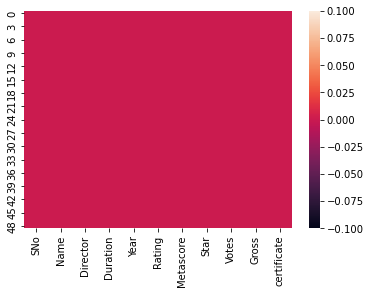

In [208]:
sns.heatmap(df.isnull())

#### Step 2
Removing skewness

In [200]:
df['certificate'].value_counts()

UA           23
U            15
A             9
R             1
Not Rated     1
Name: certificate, dtype: int64

In [201]:
df.skew()

C:\Users\dell\AppData\Local\Temp\ipykernel_8240\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


SNo          0.000000
Duration     0.000000
Year        -0.975084
Rating       0.991629
Metascore   -1.092090
Votes        0.784797
Gross        1.482939
dtype: float64

there was not a minor skew therefore it kept same

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<AxesSubplot:xlabel='Votes', ylabel='Density'>

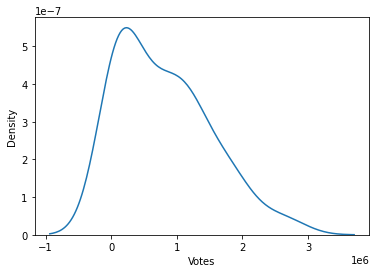

In [205]:
sns.kdeplot(df['Votes'])

## Visualization

In [209]:
df.columns

Index(['SNo', 'Name', 'Director', 'Duration', 'Year', 'Rating', 'Metascore',
       'Star', 'Votes', 'Gross', 'certificate'],
      dtype='object')

U certification films have high metascore

<AxesSubplot:xlabel='Year', ylabel='Density'>

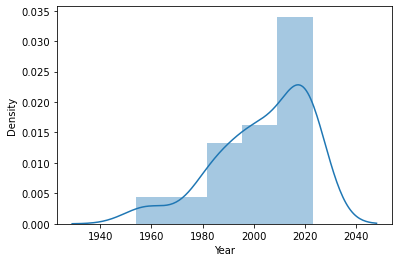

In [217]:
sns.distplot(df['Year'])

2010-2020 have most films

<AxesSubplot:xlabel='Metascore', ylabel='Density'>

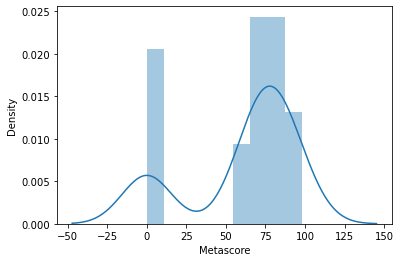

In [218]:
sns.distplot(df['Metascore'])

75-80 metascore is most common

<AxesSubplot:xlabel='Rating', ylabel='Density'>

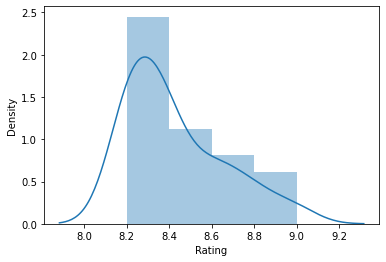

In [219]:
sns.distplot(df['Rating'])

8.2-8.4 is common

<AxesSubplot:xlabel='Gross', ylabel='Density'>

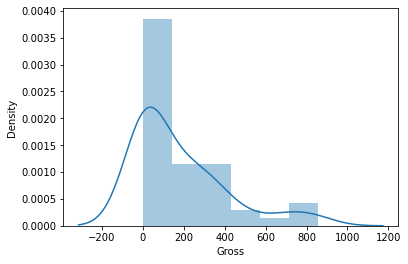

In [221]:
sns.distplot(df['Gross'])

0-150 have high density of gross

In [224]:
df.columns

Index(['SNo', 'Name', 'Director', 'Duration', 'Year', 'Rating', 'Metascore',
       'Star', 'Votes', 'Gross', 'certificate'],
      dtype='object')

<AxesSubplot:xlabel='Rating'>

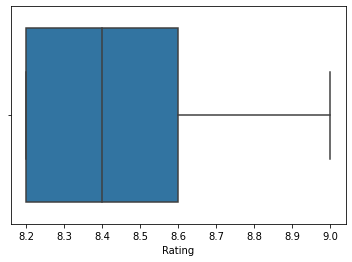

In [223]:
sns.boxplot(df['Rating'])

<AxesSubplot:xlabel='Duration'>

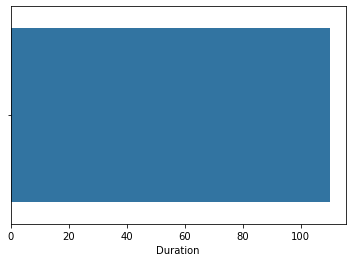

In [225]:
sns.barplot(df['Duration'])

all movies have 110 duration

<AxesSubplot:xlabel='Metascore'>

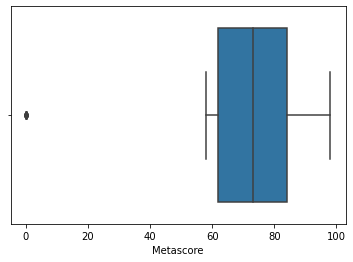

In [226]:
sns.boxplot(df['Metascore'])

there is outlier of 0's in metascore

<AxesSubplot:xlabel='Gross'>

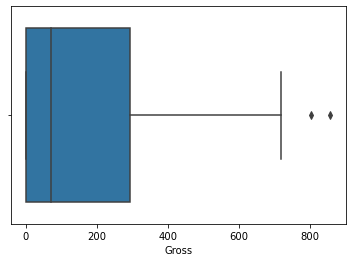

In [229]:
sns.boxplot(df['Gross'])

there is outlier in gross

<AxesSubplot:xlabel='Votes'>

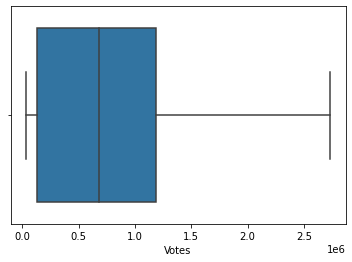

In [228]:
sns.boxplot(df['Votes'])

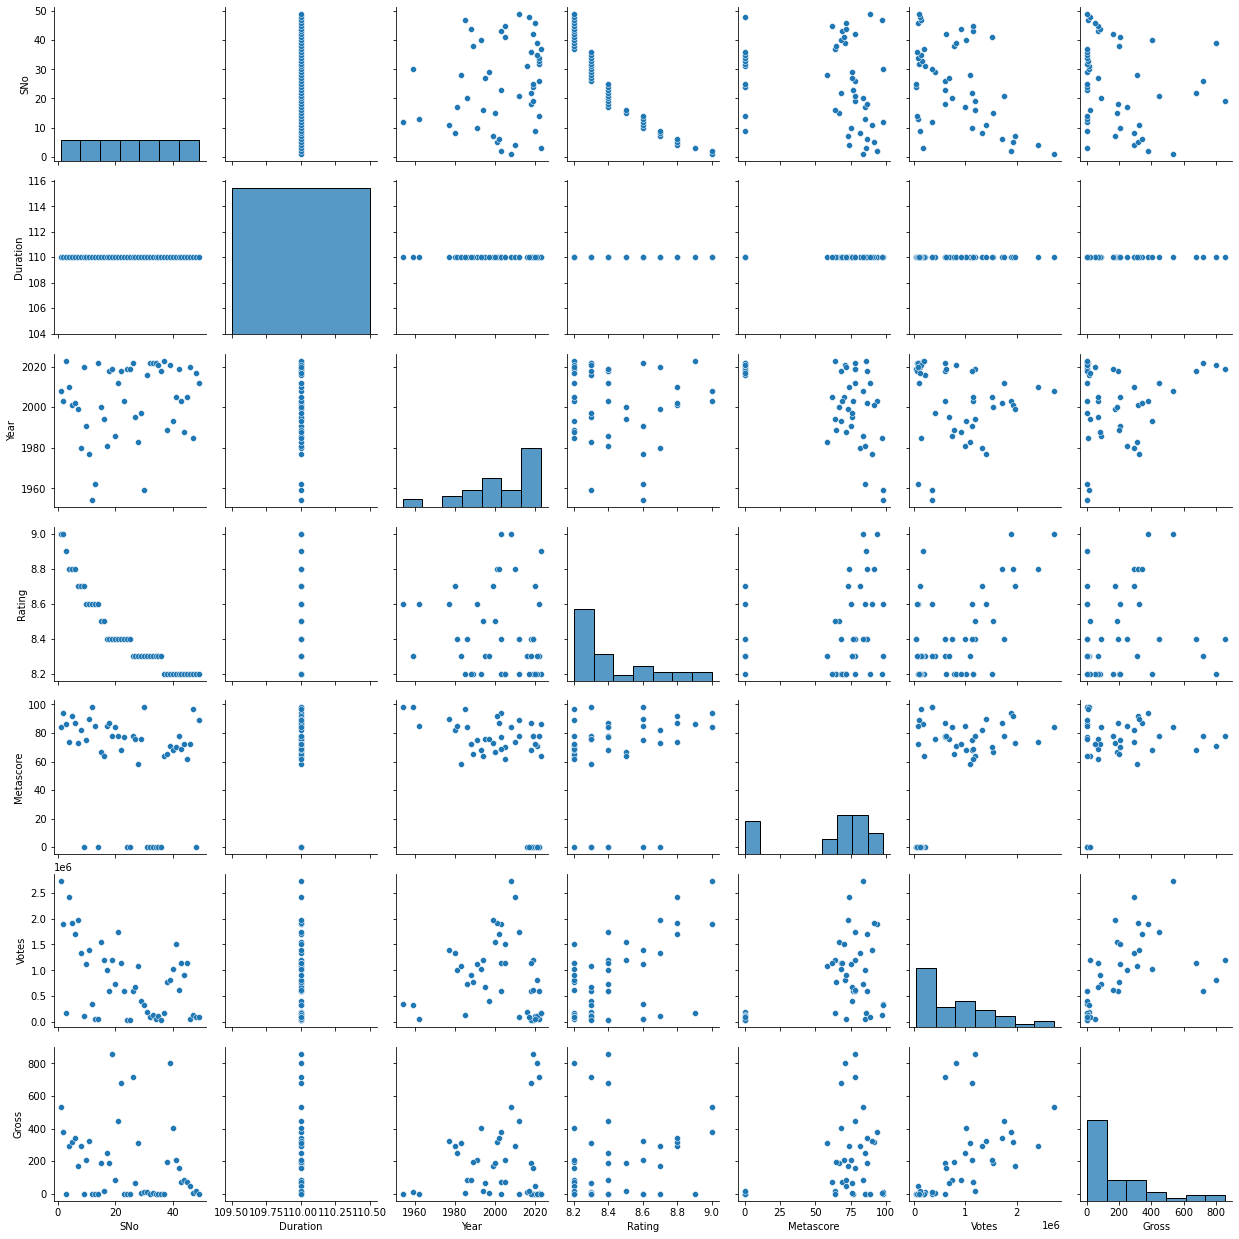

In [233]:
sns.pairplot(df)

## Label Encoding

In [234]:
df.dtypes

SNo              int32
Name            object
Director        object
Duration         int32
Year             int32
Rating         float64
Metascore        int32
Star            object
Votes            int32
Gross          float64
certificate     object
dtype: object

In [236]:
from sklearn.preprocessing import LabelEncoder

In [237]:
LE= LabelEncoder()

In [239]:
df['Name']=LE.fit_transform(df['Name'])

In [240]:
df['Director']=LE.fit_transform(df['Director'])

In [241]:
df['Star']=LE.fit_transform(df['Star'])

In [242]:
df['certificate']=LE.fit_transform(df['certificate'])

### Removing outliers

In [231]:
from scipy.stats import zscore

In [243]:
z= np.abs(zscore(df))

In [244]:
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

In [245]:
df.shape

(49, 11)

In [247]:
newdf=df[(z<3).all(axis=1)]

In [ ]:
newdf.shape

no newdf taken bcoz of 0 rows of outlier 

#### Correlation Test

In [249]:
df.corr()

,SNo,Name,Director,Duration,Year,Rating,Metascore,Star,Votes,Gross,certificate
SNo,1.000000,-0.422245,0.167749,NaN,0.191537,-0.931280,-0.242415,0.088483,-0.500204,-0.237021,-0.026245
Name,-0.422245,1.000000,-0.122940,NaN,-0.110636,0.464371,0.164335,0.061865,0.273871,0.172197,0.125391
Director,0.167749,-0.122940,1.000000,NaN,0.166669,-0.176370,-0.495077,0.038759,-0.212285,-0.184059,-0.023188
Duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,0.191537,-0.110636,0.166669,NaN,1.000000,-0.124351,-0.550442,0.039209,-0.181971,0.102251,-0.021163
Rating,-0.931280,0.464371,-0.176370,NaN,-0.124351,1.000000,0.231272,-0.096914,0.524114,0.171853,0.053524
Metascore,-0.242415,0.164335,-0.495077,NaN,-0.550442,0.231272,1.000000,-0.075858,0.506173,0.374108,-0.169346
Star,0.088483,0.061865,0.038759,NaN,0.039209,-0.096914,-0.075858,1.000000,-0.272406,0.050797,-0.055266
Votes,-0.500204,0.273871,-0.212285,NaN,-0.181971,0.524114,0.506173,-0.272406,1.000000,0.576484,-0.136356
Gross,-0.237021,0.172197,-0.184059,NaN,0.102251,0.171853,0.374108,0.050797,0.576484,1.000000,-0.119892


<AxesSubplot:>

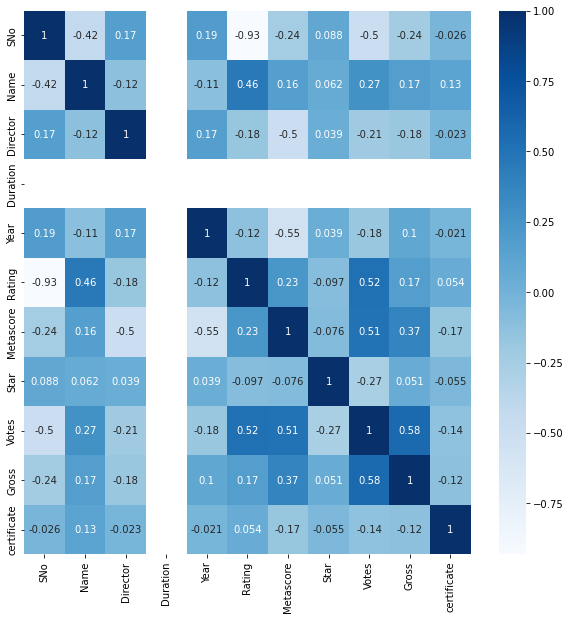

In [250]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

#### VIF

In [251]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [252]:
x=df.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 9, 10]]

In [253]:
x.shape

(49, 10)

In [254]:
x.shape[1]

10

In [255]:
y=df.iloc[:,8]

In [256]:
y.shape

(49,)

In [257]:
df

,SNo,Name,Director,Duration,Year,Rating,Metascore,Star,Votes,Gross,certificate
0,1,40,3,110,2008,9.0,84,7,2734342,534.86,4
1,2,43,25,110,2003,9.0,94,15,1895640,377.85,3
2,3,33,6,110,2023,8.9,86,34,170387,0.00,3
3,4,13,3,110,2010,8.8,74,23,2426518,292.58,4
4,5,42,25,110,2001,8.8,92,13,1924081,315.54,3
5,6,44,25,110,2002,8.8,87,14,1710753,342.55,4
6,7,45,7,110,1999,8.7,73,22,1967473,171.48,0
7,8,37,12,110,1980,8.7,82,26,1327435,290.48,4
8,9,32,35,110,2020,8.7,0,38,119885,0.00,3
9,10,39,13,110,1991,8.6,75,2,1128849,204.84,0


In [258]:
def vif_cal():
    vif=pd.DataFrame()
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['columns']=x.columns
    print(vif)

In [260]:
vif_cal()

            vif      columns
0      8.875760          SNo
1      1.346414         Name
2      1.398820     Director
3  28264.301177     Duration
4      2.014058         Year
5      8.963305       Rating
6      2.789669    Metascore
7      1.044599         Star
8      1.598348        Gross
9      1.112815  certificate


### Data Cleansing & Feature Engineering

#### Making Normal Distribution

In [269]:
from sklearn.preprocessing import StandardScaler

In [270]:
ss = StandardScaler()

In [271]:
x=ss.fit_transform(x)

In [272]:
x

array([[-1.69705627,  1.13137085, -1.28344982,  0.        ,  0.24386708,
         2.52101598,  0.68938737, -1.20670629,  1.57112716,  0.76980036],
       [-1.6263456 ,  1.34350288,  0.64083239,  0.        , -0.03532654,
         2.52101598,  0.98440904, -0.62344012,  0.87812242,  0.09622504],
       [-1.55563492,  0.6363961 , -1.0210477 ,  0.        ,  1.08144795,
         2.08140821,  0.74839171,  0.76181704, -0.78961749,  0.09622504],
       [-1.48492424, -0.77781746, -1.28344982,  0.        ,  0.35554453,
         1.64180044,  0.3943657 , -0.04017395,  0.50176095,  0.76980036],
       [-1.41421356,  1.27279221,  0.64083239,  0.        , -0.14700399,
         1.64180044,  0.92540471, -0.76925666,  0.60310092,  0.09622504],
       [-1.34350288,  1.41421356,  0.64083239,  0.        , -0.09116526,
         1.64180044,  0.77789387, -0.69634839,  0.72231663,  0.76980036],
       [-1.27279221,  1.48492424, -0.93358033,  0.        , -0.25868144,
         1.20219267,  0.36486354, -0.11308222

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [275]:
x_test.shape

(15, 10)

In [276]:
y_test.shape

(15,)

## Votes Prediction

##### Linear Reg

In [277]:
from sklearn.linear_model import LinearRegression

In [278]:
lr=LinearRegression()

In [279]:
lr.fit(x_train,y_train)

LinearRegression()

In [280]:
lr.score(x_train,y_train)

0.7442294076743414

In [281]:
lr.intercept_

820173.6913771518

In [282]:
# coef means if x increase by 1 then how many y will increase
lr.coef_

array([ 3.30623542e+05,  1.14043410e+05,  7.17898381e+04, -2.61934474e-10,
       -1.49117085e+05,  4.87385041e+05, -5.82805600e+03, -1.59196653e+05,
        3.94467925e+05, -2.14907920e+05])

In [283]:
col=df.columns

In [284]:
list(zip(lr.coef_,col))

[(330623.54181781417, 'SNo'),
 (114043.4103816335, 'Name'),
 (71789.83809575113, 'Director'),
 (-2.6193447411060333e-10, 'Duration'),
 (-149117.085495581, 'Year'),
 (487385.04102299537, 'Rating'),
 (-5828.056004133133, 'Metascore'),
 (-159196.65290170658, 'Star'),
 (394467.92547176307, 'Votes'),
 (-214907.91956781334, 'Gross')]

In [285]:
pred= lr.predict(x_test)

In [286]:
pred

array([ 451311.17780749,  607460.06764818,  794011.72648572,
        669730.13459028,  198000.71522414, 1153116.78381809,
        642469.40043882, 1746945.82719844,   65347.47446841,
         89674.321338  ,  795441.41551045, 1700164.21419105,
        188943.12410665,  579635.53492478,  932139.95972997])

In [287]:
predicted_df=pd.DataFrame(pred)

In [288]:
predicted_df.head()

,0
0,451311.177807
1,607460.067648
2,794011.726486
3,669730.134590
4,198000.715224


In [289]:
lr.score(x_test,y_test)

0.1806905296743927

#### Errors / Metrics

In [290]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [291]:
print('mean squared error=',mean_squared_error(y_test,pred))
print('root mean squared error=',np.sqrt(mean_squared_error(y_test,pred)))
print('mean abs error=',mean_absolute_error(y_test,pred))
print('r2 score/performence=',r2_score(y_test,pred))

mean squared error= 404952976196.4938
root mean squared error= 636359.1566061525
mean abs error= 493533.5625012759
r2 score/performence= 0.1806905296743927


In [383]:
def votes(values):
    values=np.array(values)
    values=values.reshape(1,-1)
    result=lr.predict(values)
    print('predicted vote is',result)

In [293]:
df.head()

,SNo,Name,Director,Duration,Year,Rating,Metascore,Star,Votes,Gross,certificate
0,1,40,1.316074,110,2008,9.0,84,7,2734342,534.86,4
1,2,43,2.236068,110,2003,9.0,94,15,1895640,377.85,3
2,3,33,1.565085,110,2023,8.9,86,34,170387,0.00,3
3,4,13,1.316074,110,2010,8.8,74,23,2426518,292.58,4
4,5,42,2.236068,110,2001,8.8,92,13,1924081,315.54,3


In [295]:
values=[1,40,1.316074,110,2008,9.0,84,7,534.86,4]

In [382]:
votes(values)

predicted age is [351396.52530923]


#### Regularization

In [297]:
# to improve accuracy of model

In [298]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [299]:
lasso= Lasso(alpha=0.0001)

In [300]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [301]:
lasso.score(x_train,y_train)

0.7442294076743414

In [302]:
lasso_pred=lasso.predict(x_test)

In [303]:
r2_score(y_test,lasso_pred)

0.18069053159516213

In [304]:
ridge=Ridge(alpha=0.1)

In [305]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [306]:
ridge.score(x_train,y_train)

0.7440725908258514

In [ ]:
ridge_pred=ridge.predict(x_test)

In [308]:
r2_score(y_test,ridge_pred)

0.1927047979723655

#### Using More algos

In [309]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [310]:
knn= KNeighborsRegressor()
dtc= DecisionTreeRegressor()
svr = SVR()

In [311]:
models = [knn,dtc,svr]

In [433]:
for i in models:
    i.fit(x_train,y_train)
    regressor_pred=i.predict(x_test)
    print('score of',i,i.score(x_train,y_train))
    print('mean squared error of',i,mean_squared_error(y_test,regressor_pred))
    print('root mean squared error of',i,np.sqrt(mean_squared_error(y_test,regressor_pred)))
    print('mean abs errorof',i,mean_absolute_error(y_test,regressor_pred))
    print('r2 score/performence of',i,r2_score(y_test,regressor_pred))
    print('\n')

score of KNeighborsRegressor() 0.3748251785532576
mean squared error of KNeighborsRegressor() 31796.421690933337
root mean squared error of KNeighborsRegressor() 178.3155116385934
mean abs errorof KNeighborsRegressor() 128.32226666666665
r2 score/performence of KNeighborsRegressor() 0.13925318970840417


score of DecisionTreeRegressor() 1.0
mean squared error of DecisionTreeRegressor() 33030.151373333334
root mean squared error of DecisionTreeRegressor() 181.74199122198846
mean abs errorof DecisionTreeRegressor() 111.62266666666666
r2 score/performence of DecisionTreeRegressor() 0.10585544139540226


score of SVR() -0.08616230121165525
mean squared error of SVR() 36922.94875721656
root mean squared error of SVR() 192.1534510676729
mean abs errorof SVR() 141.36885828552923
r2 score/performence of SVR() 0.0004752522703976858




In [427]:
# Using Decision Tree model to predict
def vote(values):
    values=np.array(values)
    values=values.reshape(1,-1)
    result=dtc.predict(values)
    print('predicted vote is',result)

In [428]:
df.head()

,SNo,Name,Director,Duration,Year,Rating,Metascore,Star,Votes,Gross,certificate
0,1,40,1.316074,110,2008,9.0,84,7,2734342,534.86,4
1,2,43,2.236068,110,2003,9.0,94,15,1895640,377.85,3
2,3,33,1.565085,110,2023,8.9,86,34,170387,0.00,3
3,4,13,1.316074,110,2010,8.8,74,23,2426518,292.58,4
4,5,42,2.236068,110,2001,8.8,92,13,1924081,315.54,3


In [429]:

values=[1,40,1.316074,110,2008,9.0,84,7,534.86,4]

In [430]:
vote(values)

predicted vote is [534.86]


In [431]:
import joblib

In [434]:
dtc_obj= joblib.dump(dtc,'votes.obj')

#### Ensemble methods 

In [318]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor

In [319]:
RF=RandomForestRegressor(random_state=42)
GB=GradientBoostingRegressor()
ADA=AdaBoostRegressor()

In [320]:
ens_algo=[RF,GB,ADA]

for i in ens_algo:
    i.fit(x_train,y_train)
    ens_algo_pred=i.predict(x_test)
    print('score of',i,i.score(x_train,y_train))
    print('mean squared error of',i,mean_squared_error(y_test,regressor_pred))
    print('root mean squared error of',i,np.sqrt(mean_squared_error(y_test,regressor_pred)))
    print('mean abs errorof',i,mean_absolute_error(y_test,regressor_pred))
    print('r2 score/performence of',i,r2_score(y_test,regressor_pred))
    print('\n')

score of RandomForestRegressor(random_state=42) 0.9697756945577888
mean squared error of RandomForestRegressor(random_state=42) 534726515844.4899
root mean squared error of RandomForestRegressor(random_state=42) 731249.9680987959
mean abs errorof RandomForestRegressor(random_state=42) 621026.6742674633
r2 score/performence of RandomForestRegressor(random_state=42) -0.08187005459376051


score of GradientBoostingRegressor() 0.9999716043617838
mean squared error of GradientBoostingRegressor() 534726515844.4899
root mean squared error of GradientBoostingRegressor() 731249.9680987959
mean abs errorof GradientBoostingRegressor() 621026.6742674633
r2 score/performence of GradientBoostingRegressor() -0.08187005459376051


score of AdaBoostRegressor() 0.9741522103211325
mean squared error of AdaBoostRegressor() 534726515844.4899
root mean squared error of AdaBoostRegressor() 731249.9680987959
mean abs errorof AdaBoostRegressor() 621026.6742674633
r2 score/performence of AdaBoostRegressor() -0.

## Gross Prediction  

In [321]:
df.columns

Index(['SNo', 'Name', 'Director', 'Duration', 'Year', 'Rating', 'Metascore',
       'Star', 'Votes', 'Gross', 'certificate'],
      dtype='object')

In [322]:
x=df.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 10]]

In [323]:
x.shape

(49, 10)

In [324]:
x.shape[1]

10

In [325]:
y=df.iloc[:,9]

In [326]:
y.shape

(49,)

In [327]:
df

,SNo,Name,Director,Duration,Year,Rating,Metascore,Star,Votes,Gross,certificate
0,1,40,1.316074,110,2008,9.0,84,7,2734342,534.86,4
1,2,43,2.236068,110,2003,9.0,94,15,1895640,377.85,3
2,3,33,1.565085,110,2023,8.9,86,34,170387,0.00,3
3,4,13,1.316074,110,2010,8.8,74,23,2426518,292.58,4
4,5,42,2.236068,110,2001,8.8,92,13,1924081,315.54,3
5,6,44,2.236068,110,2002,8.8,87,14,1710753,342.55,4
6,7,45,1.626577,110,1999,8.7,73,22,1967473,171.48,0
7,8,37,1.861210,110,1980,8.7,82,26,1327435,290.48,4
8,9,32,2.432299,110,2020,8.7,0,38,119885,0.00,3
9,10,39,1.898829,110,1991,8.6,75,2,1128849,204.84,0


#### Making Normal Distribution

In [330]:
from sklearn.preprocessing import StandardScaler

In [331]:
ss = StandardScaler()

In [332]:
x=ss.fit_transform(x)

In [333]:
x

array([[-1.69705627,  1.13137085, -1.04167663,  0.        ,  0.24386708,
         2.52101598,  0.68938737, -1.20670629,  2.77887241,  0.76980036],
       [-1.6263456 ,  1.34350288,  0.63061075,  0.        , -0.03532654,
         2.52101598,  0.98440904, -0.62344012,  1.57127598,  0.09622504],
       [-1.55563492,  0.6363961 , -0.58904624,  0.        ,  1.08144795,
         2.08140821,  0.74839171,  0.76181704, -0.91281176,  0.09622504],
       [-1.48492424, -0.77781746, -1.04167663,  0.        ,  0.35554453,
         1.64180044,  0.3943657 , -0.04017395,  2.3356552 ,  0.76980036],
       [-1.41421356,  1.27279221,  0.63061075,  0.        , -0.14700399,
         1.64180044,  0.92540471, -0.76925666,  1.61222646,  0.09622504],
       [-1.34350288,  1.41421356,  0.63061075,  0.        , -0.09116526,
         1.64180044,  0.77789387, -0.69634839,  1.30506834,  0.76980036],
       [-1.27279221,  1.48492424, -0.47727131,  0.        , -0.25868144,
         1.20219267,  0.36486354, -0.11308222

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [336]:
x_test.shape

(15, 10)

In [337]:
y_test.shape

(15,)

##### Linear Reg

In [338]:
from sklearn.linear_model import LinearRegression

In [339]:
lr=LinearRegression()

In [340]:
lr.fit(x_train,y_train)

LinearRegression()

In [341]:
lr.score(x_train,y_train)

0.6763964586910018

In [342]:
lr.intercept_

181.036076706642

In [343]:
# coef means if x increase by 1 then how many y will increase
lr.coef_

array([-2.30952047e+02, -2.93656661e+01, -1.83260298e+01, -1.70530257e-13,
        1.21510125e+02, -2.48700608e+02,  9.62882005e+01,  5.40820764e+01,
        1.90878339e+02,  8.27973789e+01])

In [344]:
col=df.columns

In [345]:
list(zip(lr.coef_,col))

[(-230.95204667482267, 'SNo'),
 (-29.365666115720305, 'Name'),
 (-18.326029785799207, 'Director'),
 (-1.7053025658242404e-13, 'Duration'),
 (121.51012467552903, 'Year'),
 (-248.70060822263076, 'Rating'),
 (96.28820052273247, 'Metascore'),
 (54.08207644621566, 'Star'),
 (190.87833931471692, 'Votes'),
 (82.7973789475163, 'Gross')]

In [346]:
pred= lr.predict(x_test)

In [347]:
pred

array([ -71.97936549,  -51.89898699, -338.53481862,  200.18700605,
        542.6486708 ,  173.49998215,  172.72280391,  280.0190466 ,
         44.89014767,  383.75346606, -177.79497589,  395.74821754,
         -1.75951828,  -75.72621336,  746.16229648])

In [348]:
predicted_df=pd.DataFrame(pred)

In [349]:
predicted_df.head()

,0
0,-71.979365
1,-51.898987
2,-338.534819
3,200.187006
4,542.648671


In [350]:
lr.score(x_test,y_test)

-0.5293633284553052

#### Errors / Metrics

In [351]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [352]:
print('mean squared error=',mean_squared_error(y_test,pred))
print('root mean squared error=',np.sqrt(mean_squared_error(y_test,pred)))
print('mean abs error=',mean_absolute_error(y_test,pred))
print('r2 score/performence=',r2_score(y_test,pred))

mean squared error= 56495.453400217
root mean squared error= 237.6877224431607
mean abs error= 188.30449722604055
r2 score/performence= -0.5293633284553052


#### Regularization

In [400]:
# to improve accuracy of model

In [401]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [402]:
lasso= Lasso(alpha=0.0001)

In [403]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [404]:
lasso.score(x_train,y_train)

0.676396458679343

In [405]:
lasso_pred=lasso.predict(x_test)

In [406]:
r2_score(y_test,lasso_pred)

-0.5293529440015665

In [407]:
ridge=Ridge(alpha=0.1)

In [408]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [409]:
ridge.score(x_train,y_train)

0.6760361379621781

In [410]:
ridge_pred=ridge.predict(x_test)

In [411]:
r2_score(y_test,ridge_pred)

-0.48700674099470365

#### Using More algos

In [412]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [413]:
knn= KNeighborsRegressor()
dtc= DecisionTreeRegressor()
svr = SVR()

In [414]:
models = [knn,dtc,svr]

In [436]:
for i in models:
    i.fit(x_train,y_train)
    regressor_pred=i.predict(x_test)
    print('score of',i,i.score(x_train,y_train))
    print('mean squared error of',i,mean_squared_error(y_test,regressor_pred))
    print('root mean squared error of',i,np.sqrt(mean_squared_error(y_test,regressor_pred)))
    print('mean abs errorof',i,mean_absolute_error(y_test,regressor_pred))
    print('r2 score/performence of',i,r2_score(y_test,regressor_pred))
    print('\n')

score of KNeighborsRegressor() 0.3748251785532576
mean squared error of KNeighborsRegressor() 31796.421690933337
root mean squared error of KNeighborsRegressor() 178.3155116385934
mean abs errorof KNeighborsRegressor() 128.32226666666665
r2 score/performence of KNeighborsRegressor() 0.13925318970840417


score of DecisionTreeRegressor() 1.0
mean squared error of DecisionTreeRegressor() 66269.42150666667
root mean squared error of DecisionTreeRegressor() 257.4284784297702
mean abs errorof DecisionTreeRegressor() 141.67733333333334
r2 score/performence of DecisionTreeRegressor() -0.7939500782881415


score of SVR() -0.08616230121165525
mean squared error of SVR() 36922.94875721656
root mean squared error of SVR() 192.1534510676729
mean abs errorof SVR() 141.36885828552923
r2 score/performence of SVR() 0.0004752522703976858




In [423]:
# Using Decision Tree model to predict
def gross(values):
    values=np.array(values)
    values=values.reshape(1,-1)
    result=dtc.predict(values)
    print('predicted gross is',result)

In [424]:
df.head()

,SNo,Name,Director,Duration,Year,Rating,Metascore,Star,Votes,Gross,certificate
0,1,40,1.316074,110,2008,9.0,84,7,2734342,534.86,4
1,2,43,2.236068,110,2003,9.0,94,15,1895640,377.85,3
2,3,33,1.565085,110,2023,8.9,86,34,170387,0.00,3
3,4,13,1.316074,110,2010,8.8,74,23,2426518,292.58,4
4,5,42,2.236068,110,2001,8.8,92,13,1924081,315.54,3


In [425]:

values=[1,40,1.316074,110,2008,9.0,84,7,2734342,4]

In [426]:

gross(values)

predicted gross is [534.86]


#### Ensemble methods 

In [420]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor

In [379]:
RF=RandomForestRegressor(random_state=42)
GB=GradientBoostingRegressor()
ADA=AdaBoostRegressor()

In [380]:
ens_algo=[RF,GB,ADA]

for i in ens_algo:
    i.fit(x_train,y_train)
    ens_algo_pred=i.predict(x_test)
    print('score of',i,i.score(x_train,y_train))
    print('mean squared error of',i,mean_squared_error(y_test,regressor_pred))
    print('root mean squared error of',i,np.sqrt(mean_squared_error(y_test,regressor_pred)))
    print('mean abs errorof',i,mean_absolute_error(y_test,regressor_pred))
    print('r2 score/performence of',i,r2_score(y_test,regressor_pred))
    print('\n')

score of RandomForestRegressor(random_state=42) 0.9457741131281787
mean squared error of RandomForestRegressor(random_state=42) 36922.94875721656
root mean squared error of RandomForestRegressor(random_state=42) 192.1534510676729
mean abs errorof RandomForestRegressor(random_state=42) 141.36885828552923
r2 score/performence of RandomForestRegressor(random_state=42) 0.0004752522703976858


score of GradientBoostingRegressor() 0.9999729560136137
mean squared error of GradientBoostingRegressor() 36922.94875721656
root mean squared error of GradientBoostingRegressor() 192.1534510676729
mean abs errorof GradientBoostingRegressor() 141.36885828552923
r2 score/performence of GradientBoostingRegressor() 0.0004752522703976858


score of AdaBoostRegressor() 0.9804030326182599
mean squared error of AdaBoostRegressor() 36922.94875721656
root mean squared error of AdaBoostRegressor() 192.1534510676729
mean abs errorof AdaBoostRegressor() 141.36885828552923
r2 score/performence of AdaBoostRegressor(

#### Exporting Decision Tree Model

In [437]:
dtc_obj= joblib.dump(dtc,'gross.obj')

# Decision tree classifier choosen bcoz of accuracy of 100%